# EDA - Análisis de siniestros viales en la Ciudad Autónoma de Buenos Aires, Argentina

In [2]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from pandas_profiling import ydata_profiling


In [3]:
# Cargamos los datos
df_victimas = pd.read_parquet('./Datasets/homicidios-VICTIMAS-limpio.parquet')
df_hechos = pd.read_parquet('./Datasets/homicidios-HECHOS-limpio.parquet')

Vamos a realizar un análisis exploratorio de las columnas relevantes en busca de valores atípicos en ambos DataFrames.

In [4]:
# Análisis de valores atípicos en el DataFrame de Víctimas
df_victimas.describe(include='all')


,ID_hecho,FECHA,ROL,VICTIMA,SEXO,EDAD,FALLECIMIENTO,Rango_Etario
count,717,717,717,717,717,717,717,717
unique,696,NaN,5,8,3,86,2,10
top,2017-0035,NaN,CONDUCTOR,MOTO,MASCULINO,SD,FALLECIDO,25-34
freq,3,NaN,330,303,545,53,648,170
mean,NaN,2018-09-09 01:36:24.100418304,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2017-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2018-07-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2019-12-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,2021-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Análisis de valores atípicos en el DataFrame de Hechos
df_hechos.describe(include='all')


,ID,N_VICTIMAS,FECHA,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,DIA_SEMANA
count,684,684.000000,684,684,684,684,684,684,684.000000,684.000000,684.000000,684,684,684,684
unique,684,NaN,NaN,316,25,671,4,632,NaN,NaN,NaN,41,10,10,7
top,2016-0001,NaN,NaN,21:00:00,7,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,27 DE FEBRERO AV. y ESCALADA AV.,NaN,NaN,NaN,PEATON-PASAJEROS,MOTO,AUTO,Monday
freq,1,NaN,NaN,10,41,4,429,5,NaN,NaN,NaN,105,288,202,103
mean,NaN,1.029240,2018-09-18 00:33:41.052631552,NaN,NaN,NaN,NaN,NaN,7.421053,-58.441545,-34.619632,NaN,NaN,NaN,NaN
min,NaN,1.000000,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,-58.529942,-34.705250,NaN,NaN,NaN,NaN
25%,NaN,1.000000,2017-04-03 00:00:00,NaN,NaN,NaN,NaN,NaN,4.000000,-58.476218,-34.643689,NaN,NaN,NaN,NaN
50%,NaN,1.000000,2018-07-16 00:00:00,NaN,NaN,NaN,NaN,NaN,8.000000,-58.444513,-34.622928,NaN,NaN,NaN,NaN
75%,NaN,1.000000,2020-01-04 06:00:00,NaN,NaN,NaN,NaN,NaN,11.000000,-58.401841,-34.596799,NaN,NaN,NaN,NaN
max,NaN,3.000000,2021-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,15.000000,-58.356082,-34.534654,NaN,NaN,NaN,NaN


A primera vista, no se observan valores atípicos evidentes. Las variables como la edad y el número de víctimas en el DataFrame de Hechos tienen distribuciones razonables, sin extremos notables.

#### Número total de víctimas fatales por año.

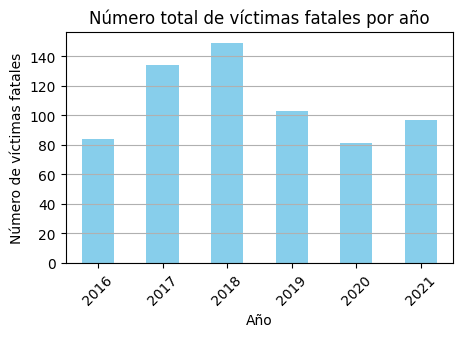

In [6]:
# Filtramos los datos para incluir solo los registros de fallecidos
df_fallecidos = df_victimas[df_victimas['FALLECIMIENTO'] == 'FALLECIDO']

# Agrupamos por año y contamos el número de víctimas fatales por año
victimas_por_año = df_fallecidos.groupby(df_fallecidos['FECHA'].dt.year)['ID_hecho'].count()

# Creamos un gráfico de barras para el número total de víctimas fatales por año
plt.figure(figsize=(5, 3))
victimas_por_año.plot(kind='bar', color='skyblue')
plt.title('Número total de víctimas fatales por año')
plt.xlabel('Año')
plt.ylabel('Número de víctimas fatales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()




Durante el periodo de 2016 a 2018, hubo un incremento considerable en la cantidad de accidentes viales en la Ciudad Autónoma de Buenos Aires (CABA). Esto podría estar relacionado con diversos factores, como el aumento del parque automotor, el crecimiento de la población o cambios en las políticas de tráfico.
Con respecto a la disminucion considerable de accidentes en 2020 a causa de la pandemia de COVID-19, las medidas de confinamiento implementadas contribuyeron a la reducción de accidentes viales. Con menos personas circulando en las calles y menos actividad económica se registraron menos accidentes.
Después de la disminución en 2020, los accidentes viales volvieron a aumentar en 2021. Sin embargo, es importante destacar que la cifra no superó los picos alcanzados en 2018. Esto puede sugerir que las condiciones que llevaron al aumento en 2018 aún persisten, acompañado de las ultimas etapas de medidas dispuestas por pandemia

#### Número total de víctimas fatales por mes desde 2016 a 2021

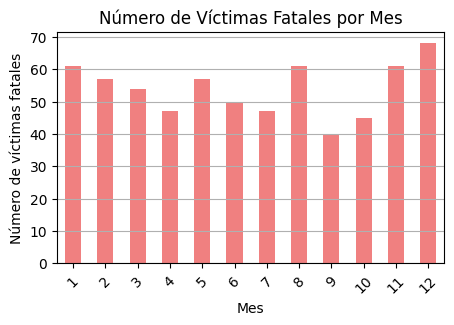

In [12]:
# Agrupamos por mes y contamos el número de víctimas fatales por mes
victimas_por_mes = df_fallecidos.groupby(df_fallecidos['FECHA'].dt.month)['ID_hecho'].count()

# Creamos una gráfica de barras para el número de víctimas fatales por mes en el año seleccionado
plt.figure(figsize=(5, 3))
victimas_por_mes.plot(kind='bar', color='lightcoral')
plt.title(f'Número de Víctimas Fatales por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de víctimas fatales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

En esta grafica podemos observar un pico de accidentes fatales en Diciembre y Enero, estos meses suelen ser períodos de vacaciones y festividades, lo que puede aumentar la circulación de vehículos en las calles y, por lo tanto, el riesgo de accidentes. Además, factores como el consumo de alcohol durante las fiestas puede contribuir a una mayor incidencia de accidentes. 
Para abordar esta situación, se podrían implementar estrategias específicas durante estos meses, como campañas de concientización sobre seguridad vial, controles de alcoholemia más estrictos y refuerzo de medidas de prevención en áreas identificadas como de alto riesgo

#### Proporción de Género entre las Víctimas Fatales:

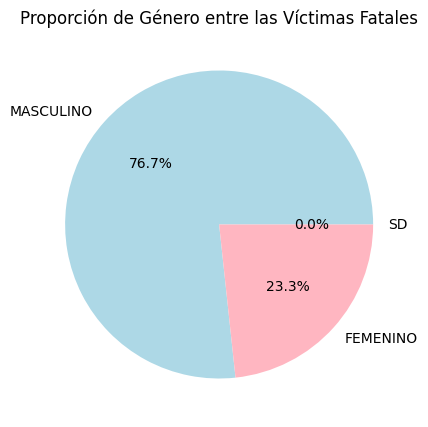

In [67]:
# Contamos el número de víctimas fatales por género
victimas_por_genero = df_fallecidos['SEXO'].value_counts()

# Creamos un gráfico de torta para la proporción de género entre las víctimas fatales
plt.figure(figsize=(5, 5))
plt.pie(victimas_por_genero, labels=victimas_por_genero.index, autopct='%1.1f%%', colors=['lightblue', 'lightpink'])
plt.title('Proporción de Género entre las Víctimas Fatales')
plt.show()


El predominio de víctimas masculinas en los accidentes viales refleja una tendencia comúnmente observada en muchos países. Históricamente, ha habido más hombres que mujeres involucrados en actividades de conducción, tanto a nivel profesional como personal. Esto puede estar relacionado con factores como el trabajo, actividades recreativas y roles de género tradicionales. Además, estudios sugieren que los hombres tienden a asumir comportamientos de riesgo al volante con más frecuencia que las mujeres, tales como exceso de velocidad, conducción distraída o manejo bajo la influencia del alcohol u otras drogas. Esto aumenta la exposición masculina al riesgo de accidentes.
Para abordar esta disparidad en las tasas de víctimas fatales por género, las estrategias de seguridad vial podrían incluir campañas específicas dirigidas a conductores masculinos para promover comportamientos seguros y mejorar la educación vial desde edades tempranas.

#### Distribución de Víctimas Fatales por Rango Etario

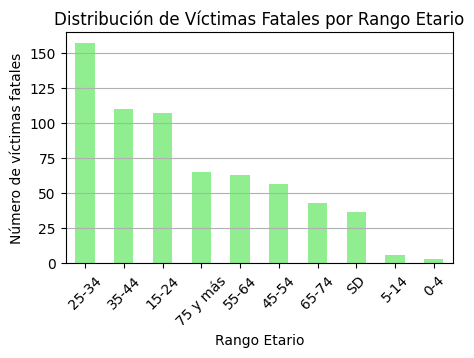

In [66]:
# Contamos el número de víctimas fatales por rango etario
victimas_por_rango_etario = df_fallecidos['Rango_Etario'].value_counts()

# Creamos un gráfico de barras para la distribución de víctimas fatales por rango etario
plt.figure(figsize=(5, 3))
victimas_por_rango_etario.plot(kind='bar', color='lightgreen')
plt.title('Distribución de Víctimas Fatales por Rango Etario')
plt.xlabel('Rango Etario')
plt.ylabel('Número de víctimas fatales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Este grafico nos sugiere varias posibles interpretaciones:

Falta de experiencia: Los conductores más jóvenes, especialmente aquellos en el rango de 25-34 años, pueden tener menos experiencia al volante en comparación con grupos de edad más avanzada. Esta falta de experiencia puede contribuir a una mayor incidencia de accidentes.

Comportamientos de riesgo: Los adultos jóvenes a menudo se ven involucrados en comportamientos de riesgo al volante, como conducir a alta velocidad, distracciones por el uso de dispositivos móviles u otras actividades, y una mayor propensión a conducir bajo la influencia del alcohol o drogas.

Estilo de vida activo: Las personas en el rango de edad de 25-34 años pueden tener un estilo de vida más activo que los mayores de 35 años, lo que implica más desplazamientos y, por lo tanto, un mayor riesgo de exposición a accidentes.

#### Distribución de Víctimas por Tipo de Vehículo:

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_10672\3268247688.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tipo_vehiculo = df_hechos.groupby('ACUSADO').size().reset_index(name='N_VICTIMAS')
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_10672\3268247688.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='ACUSADO', y='N_VICTIMAS', data=df_tipo_vehiculo, palette='pastel')  # Utiliza 'pastel' para la paleta de colores


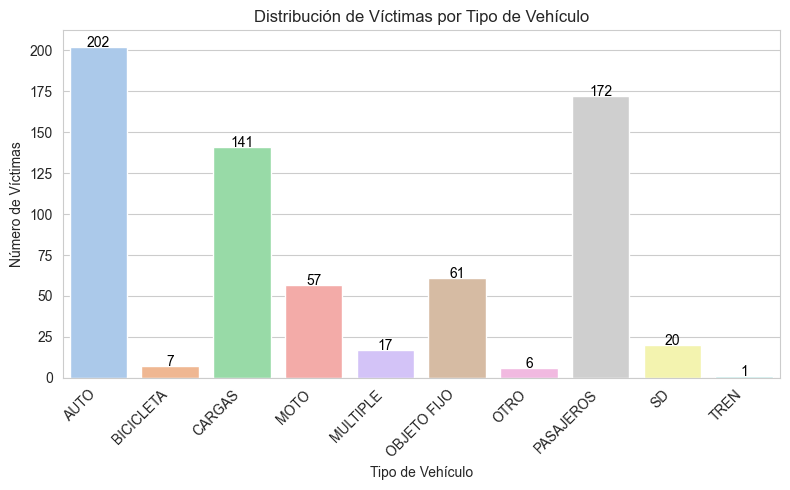

In [83]:
# Agrupamos por tipo de vehículo y contamos el número de víctimas
df_tipo_vehiculo = df_hechos.groupby('ACUSADO').size().reset_index(name='N_VICTIMAS')

df_tipo_vehiculo = df_tipo_vehiculo.sort_values(by='N_VICTIMAS', ascending=False)
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
barplot = sns.barplot(x='ACUSADO', y='N_VICTIMAS', data=df_tipo_vehiculo, palette='pastel')  # Utiliza 'pastel' para la paleta de colores
barplot.set_xlabel('Tipo de Vehículo')
barplot.set_ylabel('Número de Víctimas')
barplot.set_title('Distribución de Víctimas por Tipo de Vehículo')

# Rotación de etiquetas en el eje x para mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostramos los valores en las barras
for index, row in df_tipo_vehiculo.iterrows():
    barplot.text(row.name, row.N_VICTIMAS, row.N_VICTIMAS, color='black', ha="center")

plt.tight_layout()
plt.show()


#### Distribución de Víctimas por Rol:

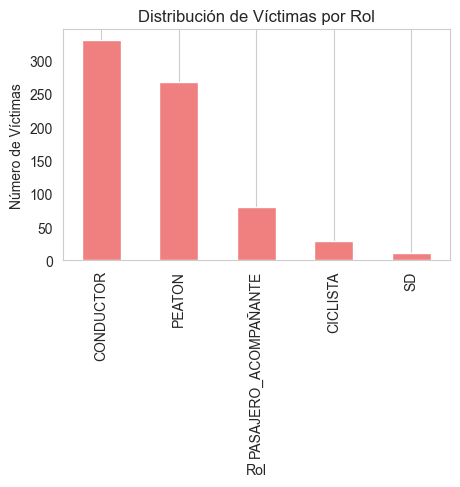

In [87]:
# Contamos el número de víctimas por rol
victimas_por_rol = df_victimas['ROL'].value_counts()

# Creamos un gráfico de barras para la distribución de víctimas por rol
plt.figure(figsize=(5, 3))
victimas_por_rol.plot(kind='bar', color='lightcoral')
plt.title('Distribución de Víctimas por Rol')
plt.xlabel('Rol')
plt.ylabel('Número de Víctimas')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


#### Distribución de Víctimas Fatales por Grupo Etario y Rol

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_10672\3498999775.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_filt.groupby(['Rango_Etario', 'VICTIMA']).size().unstack(fill_value=0)


<Figure size 1000x600 with 0 Axes>

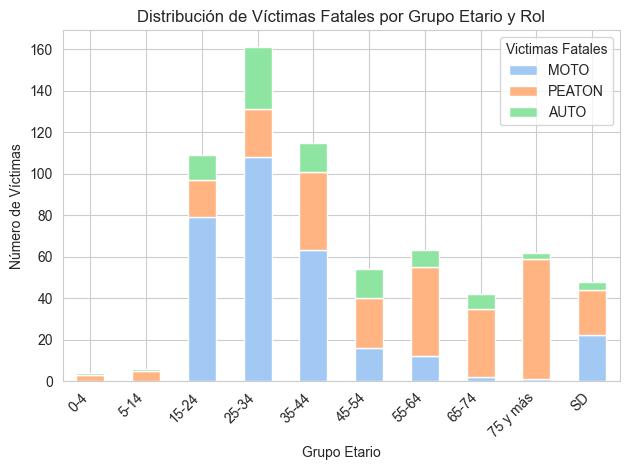

In [91]:
# Filtramos por motociclistas, peatones y ocupantes de automóvil
df_filt = df_victimas[df_victimas['VICTIMA'].isin(['MOTO', 'PEATON', 'AUTO'])]

# Agrupamos por grupo etario y contamos el número de víctimas por rol
df_grouped = df_filt.groupby(['Rango_Etario', 'VICTIMA']).size().unstack(fill_value=0)

# Reordenamos las columnas para asegurar el orden deseado en el gráfico
df_grouped = df_grouped[['MOTO', 'PEATON', 'AUTO']]

# Creamos un gráfico de barras apiladas
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
df_grouped.plot(kind='bar', stacked=True)
plt.xlabel('Grupo Etario')
plt.ylabel('Número de Víctimas')
plt.title('Distribución de Víctimas Fatales por Grupo Etario y Rol')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Victimas Fatales')
plt.tight_layout()
plt.show()


En este gráfico, podemos notar una alta incidencia de víctimas de entre 15 y 34 años que conducen motos. Este grupo de edad puede estar relacionado con el uso generalizado de motos por razones económicas, de fácil adquisición y desplazamiento urbano. Este grupo también puede tener una mayor propensión a asumir riesgos al conducir, lo que aumenta su vulnerabilidad en caso de accidentes.

También podemos notar un número considerable de víctimas adultas mayores que son peatones. Los adultos mayores, especialmente aquellos de 75 años y más, son más propensos a ser peatones en situaciones de accidentes viales. Esto puede estar relacionado con la movilidad reducida, menor capacidad de reacción y vulnerabilidad física de las personas mayores al enfrentarse a situaciones de tráfico.